<a href="https://colab.research.google.com/github/Squirrelcoding/mini-projects/blob/main/Cereal_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 80 Cereals EDA

This is a simple exploratory data analysis of the [80 Cereals](https://www.kaggle.com/datasets/crawford/80-cereals) dataset. We aim to answer the following questions:

- What makes a cereal healthy, and what features drive the rating? Can the rating be predicted from the nutriton facts?

- Do cereals from certain manufacturers contain more sugar than others?

- Can cereals be clustered into healthy and non-healthy categories without the rating?

- Does the shelf tell us anything about the cereal?

# Understanding the data

We begin by downloading the dataset and loading it into a dataframe.

In [ ]:
import kagglehub
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()


# Download latest version
path = kagglehub.dataset_download("crawford/80-cereals")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/80-cereals


In [ ]:
import pandas as pd

df = pd.read_csv(path + "/cereal.csv")

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [41]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [47]:
df_cat = ['name', 'mfr', 'type']
df_num = [col for col in df.columns if col not in df_cat]

df_cat, df_num

(['name', 'mfr', 'type'],
 ['calories',
  'protein',
  'fat',
  'sodium',
  'fiber',
  'carbo',
  'sugars',
  'potass',
  'vitamins',
  'shelf',
  'weight',
  'cups',
  'rating'])

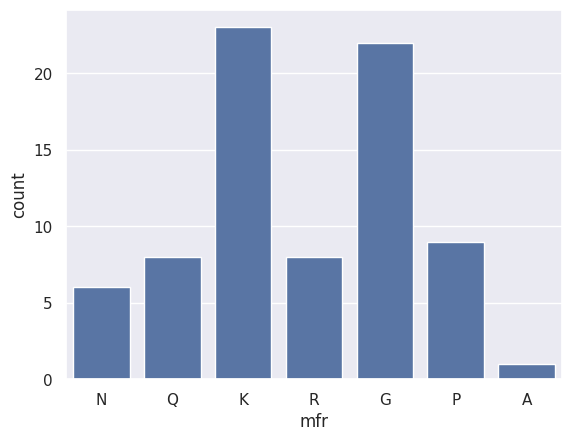

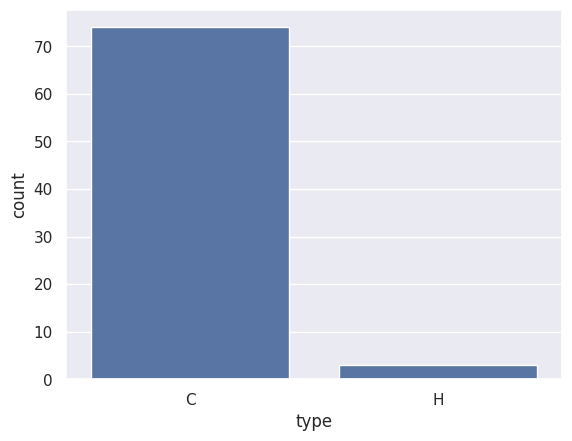

In [54]:
for cat in df_cat:
  if cat == 'name':
    continue
  sns.countplot(x=cat, data=df)
  plt.show()

Most of the cereals are manufactured by Kelloggs and General Mills. There are very few (only three) "hot" cereals.

In [55]:
df['type'].value_counts()

,count
type,
C,74
H,3


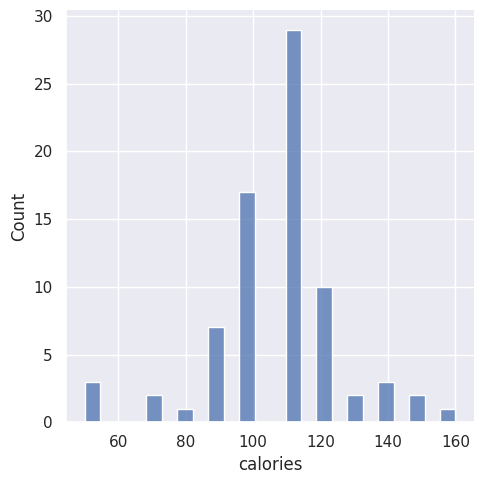

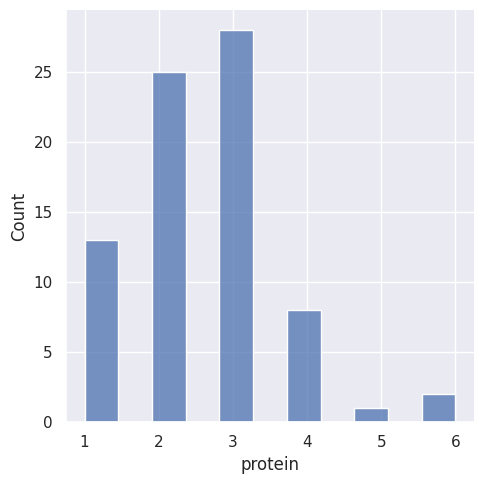

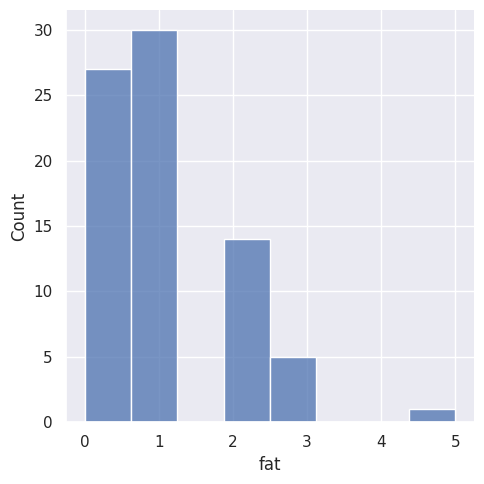

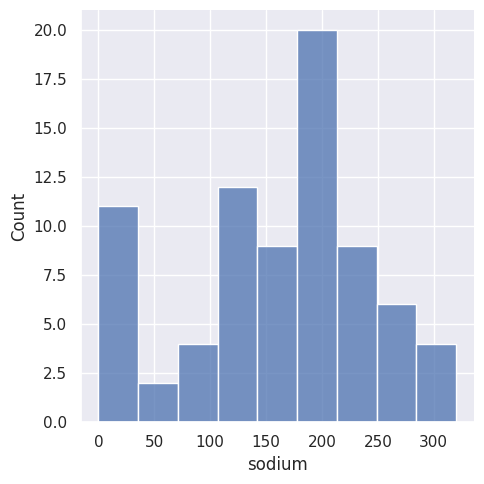

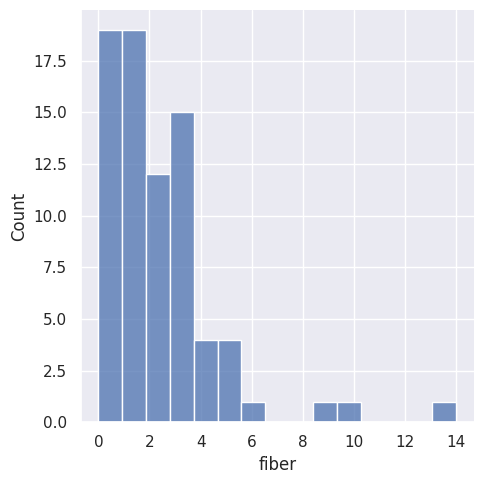

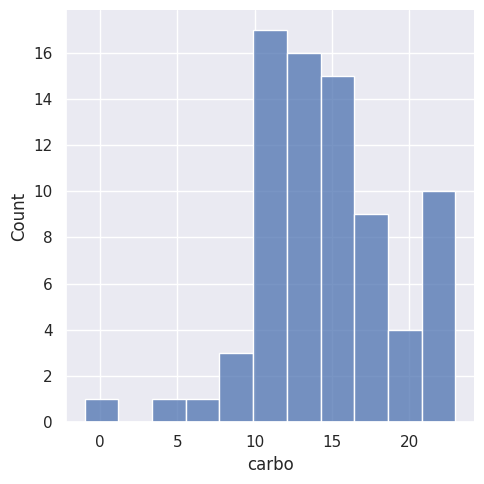

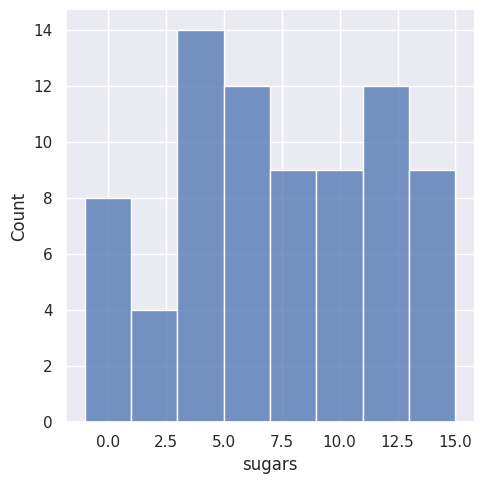

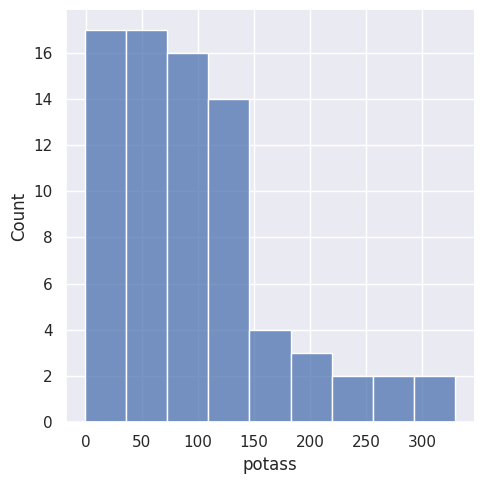

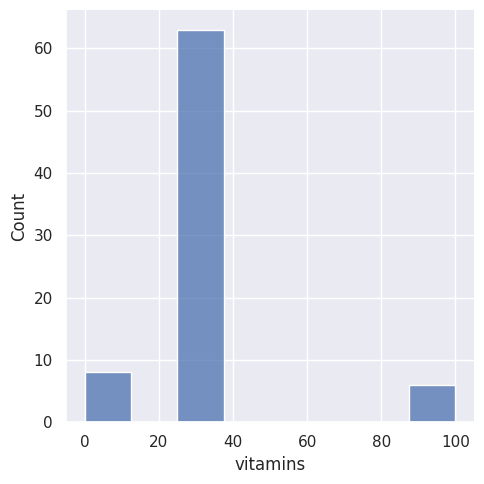

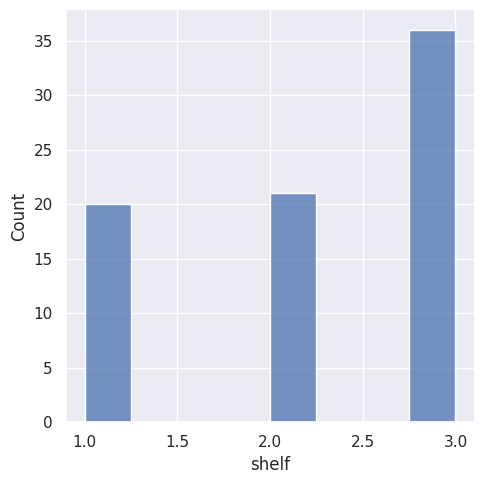

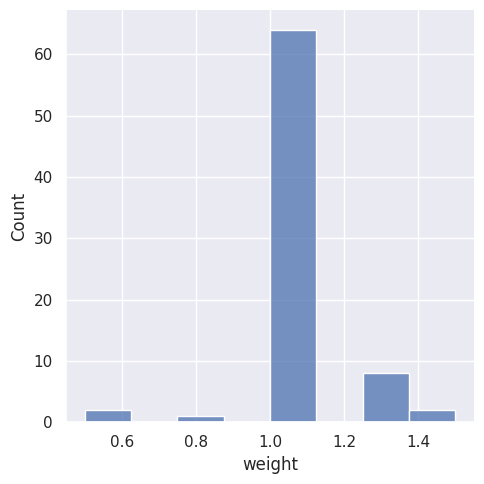

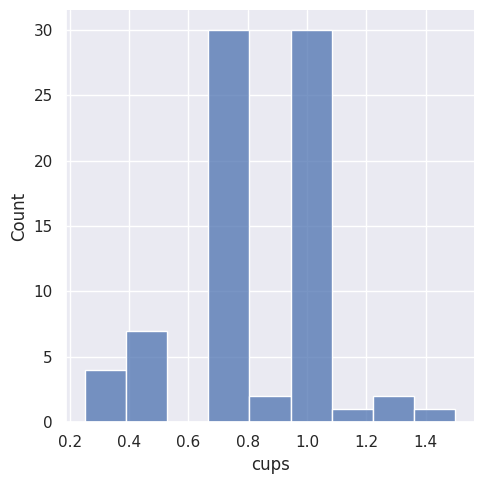

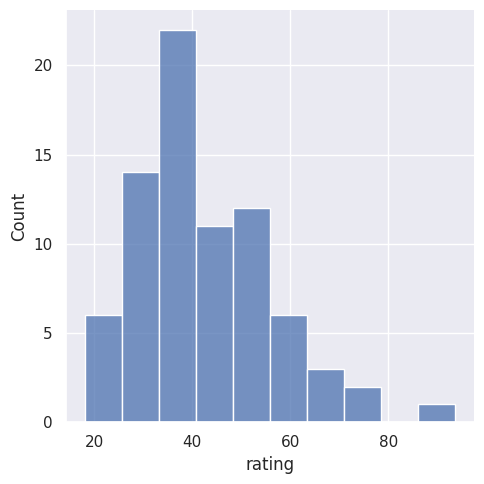

In [58]:
for num in df_num:
  sns.displot(df, x=num)
  plt.show()

Most of the numerical data is normally distributed (or log-normal) with a few exceptions. Now we plot a correlation map between the numerical variables.

          calories   protein       fat    sodium     fiber     carbo  \
calories  1.000000  0.019066  0.498610  0.300649 -0.293413  0.250681   
protein   0.019066  1.000000  0.208431 -0.054674  0.500330 -0.130864   
fat       0.498610  0.208431  1.000000 -0.005407  0.016719 -0.318043   
sodium    0.300649 -0.054674 -0.005407  1.000000 -0.070675  0.355983   
fiber    -0.293413  0.500330  0.016719 -0.070675  1.000000 -0.356083   
carbo     0.250681 -0.130864 -0.318043  0.355983 -0.356083  1.000000   
sugars    0.562340 -0.329142  0.270819  0.101451 -0.141205 -0.331665   
potass   -0.066609  0.549407  0.193279 -0.032603  0.903374 -0.349685   
vitamins  0.265356  0.007335 -0.031156  0.361477 -0.032243  0.258148   
shelf     0.097234  0.133865  0.263691 -0.069719  0.297539 -0.101790   
weight    0.696091  0.216158  0.214625  0.308576  0.247226  0.135136   
cups      0.087200 -0.244469 -0.175892  0.119665 -0.513061  0.363932   
rating   -0.689376  0.470618 -0.409284 -0.401295  0.584160  0.05

<Axes: >

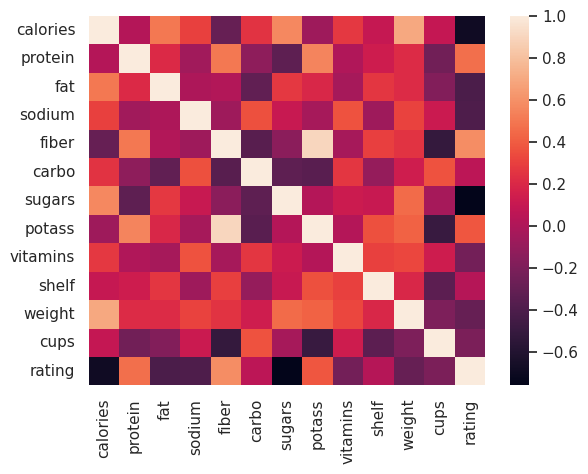

In [59]:
num_data = df[df_num]

print(num_data.corr())

sns.heatmap(num_data.corr())

We can immediately see some strong correlations:

- Rating and calories are strongly negatively correlated. This makes sense since a cereal with a lot of calories per serving size is typically going to be unhealthier. A similar thing can be said about the rating and sugar.

- Weight and calories also have a correlation.

- Fiber and cups
- Potassium and cups
- Protein and fiber